# Анализ и принятие решения по А/В тесту

## Описание проекта.

Я аналитик интернет-магапзина . Вместе с отделом маркетинга мы подготовили список гипотиз для увеличения выручки.  


Требуется:

1. Приоритизировать гипотезы.

2. Запустить A/B тест.

3. Проанализировать результаты.

## Приоритизация гипотиз

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')

pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150

display(data)

data['ICE'] = (data['Impact'] * data['Confidence']) / data['Efforts']
display(data[{'Hypothesis', 'ICE'}].sort_values(by='ICE', ascending=False))

data['RICE'] = (data['Reach'] * data['Impact'] * data['Confidence']) / data['Efforts']
display(data[{'Hypothesis', 'RICE'}].sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


,RICE,Hypothesis
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения"
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


### Вывод:   


 Провели приоритизацию способами ICE и RICE. Видим, что после применения второго способа приоритеты значительно изменились. Гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" теперь стала однозначным лидером. Так происходит потому, что в способе RICE дополнительно учитывается параметр Reach, который показывает  скольких пользователей затронет изменение, которое вы хотите внести. Значит гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" охватит самое большое количество пользователей.

## Анализ A/B-теста

 Проверяю на явные дубликаты и пропуски

In [3]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

display(orders.head(5))
orders.info()
print(orders.duplicated().sum())

display(visitors.head(5))
visitors.info()
print(orders.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
0


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
0


 Нахожу visitorId попавшие в обе группы

In [4]:
np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

 Для частоты теста удалим эти id из данных

In [5]:


dublicat =   [ 8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
        1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
        1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
        2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
        2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
        2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
        3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
        3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
        3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
        4186807279, 4256040402, 4266935830]
orders = orders.query('visitorId != @dublicat').reset_index() 
display(orders) 



,index,transactionId,visitorId,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,1650,B
1,1,2804400009,3642806036,2019-08-15,730,B
2,3,3797467345,1196621759,2019-08-15,9759,B
3,4,2282983706,2322279887,2019-08-15,2308,B
4,5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...,...
1011,1191,3592955527,608641596,2019-08-14,16490,B
1012,1192,2662137336,3733762160,2019-08-14,6490,B
1013,1193,2203539145,370388673,2019-08-14,3190,A
1014,1194,1807773912,573423106,2019-08-14,10550,A


 Вывод: 
    
    1. Пропусков и дубликатов в данных нет.
    
    2. Пользователей попавших в обе группы удалили. 
    
    3. Данные готовы к анализу.
    
   

Создаю масив уникальных пар значений дат и групп теста

In [6]:
dates_groups = orders[['date','group']].drop_duplicates()

Собераю агрегированные кумулятивные по дням данные

In [7]:
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединяю обе таблицы в одну с понятными названиями столбцов

In [8]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulative_data.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


### Строю графики кумулятивной выручки по дням и группам A/B-тестирования

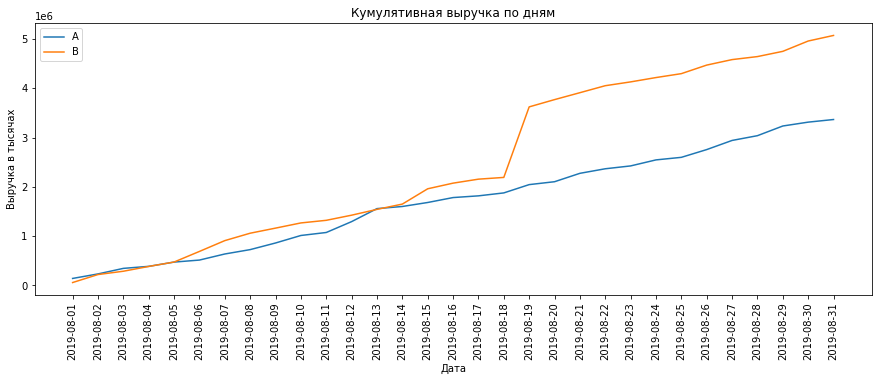

In [9]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15,5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('Выручка в тысячах')
plt.title('Кумулятивная выручка по дням')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Вывод: 

1. Выручка увеличивается в течении всего теста.

2. Выручка группы B практически постоянно выше выручки группы А.

3. В графике есть резкие скачки, что показывает о наличии выбросов. Либо очень дорогшие заказы, либо всплеск числа заказов.

4. Надо посмотреть график по среднему чеку.

### Строю графики среднего чека по группам

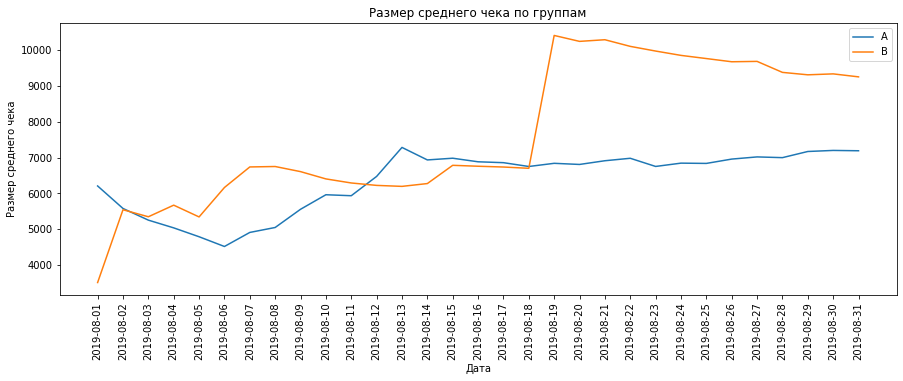

In [10]:
plt.figure(figsize=(15,5))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.xlabel('Дата')
plt.ylabel('Размер среднего чека')
plt.title('Размер среднего чека по группам')
plt.xticks(rotation=90)

plt.legend()
plt.show()

Вывод:

1. Показатели среднего чека группы А к концу более или менее стабилизируется.

2. В группу В после середины теста попал аномально дорогой заказ.

3. Построить график относительного различия для среднего чека.

### Строю график относительного различия для среднего чека

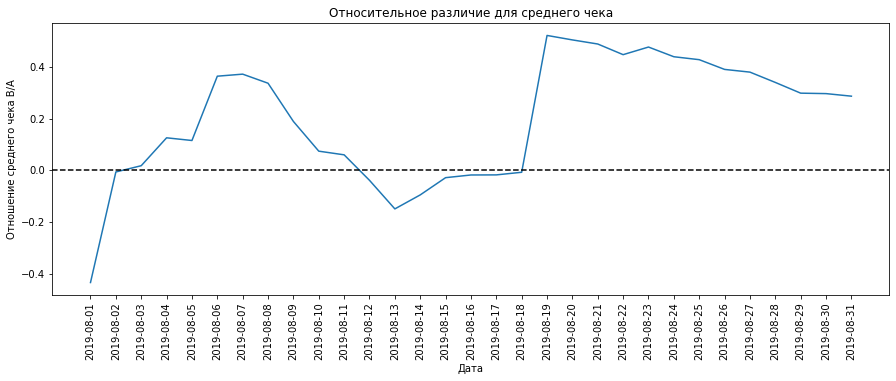

In [11]:
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека B/A')
plt.title('Относительное различие для среднего чека')
plt.xticks(rotation=90)

plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Вывод:

На графике чётко видны скачки, что говорит о наличии выбросов. Для правильного анализа их надо будет удалить.

### Строю график кумулятивной конверсии по группам

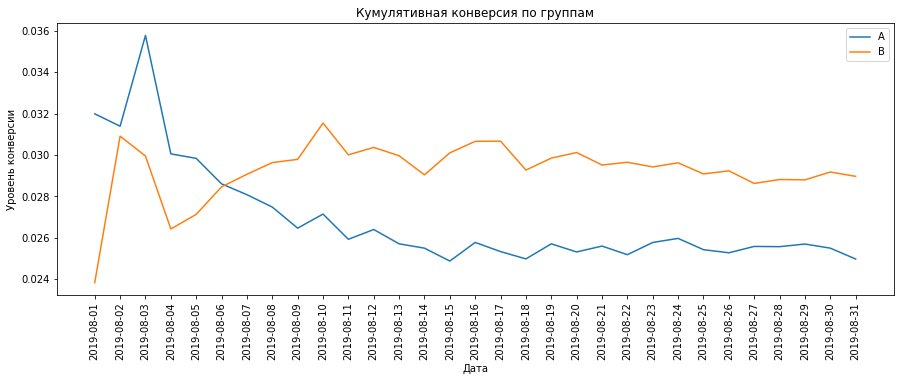

In [12]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(15,5))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.xlabel('Дата')
plt.ylabel('Уровень конверсии')
plt.title('Кумулятивная конверсия по группам')
plt.xticks(rotation=90)

plt.legend()
plt.show()

Вывод: 

После стабилизации конверсия группы В стабильно выше.

### Строю график относительного изменения кумулятивной конверсии 

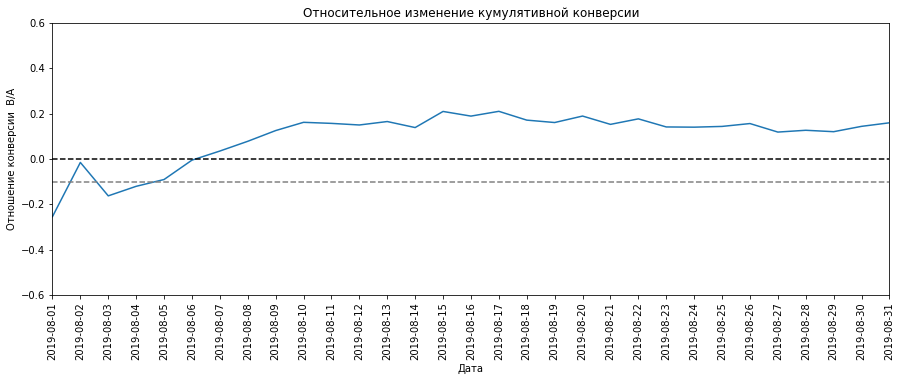

In [13]:
merged_сumulative_сonversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.plot(merged_сumulative_сonversions['date'], merged_сumulative_сonversions['conversionB']/merged_сumulative_сonversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6])

plt.xlabel('Дата')
plt.ylabel('Отношение конверсии  B/A')
plt.title('Относительное изменение кумулятивной конверсии')
plt.xticks(rotation=90)

plt.show()

Вывод: 

После стабилизации конверсия группы В стабильно выше.

### Постройте точечный график количества заказов по пользователям

         userId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


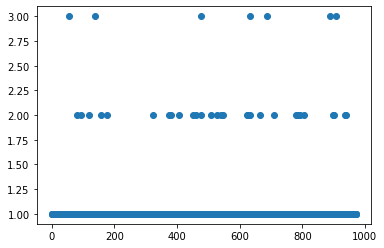

In [14]:
orders_by_users = (orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
    

orders_by_users.columns = ['userId', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])
plt.show()

Вывод:

Количество пользователей у которых больше 2 заказов значительно уменьшается.

### Подсчитываю 95-й и 99-й перцентили количества заказов на пользователя

In [15]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


Вывод: 

1. Не более 5% пользователей делают больше 1 заказов. И 1% не больше 2.

2. В дальнейших иследованиях буду использовать данные пользователей до 1 заказов

### Строю точечный график стоимостей заказов

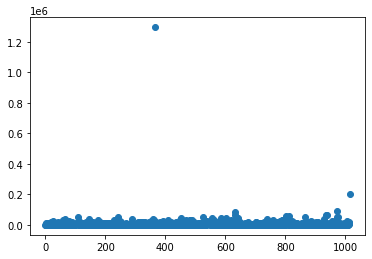

In [16]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.show()

Вывод:

Видны пару явно более дорогих заказов.

### Подсчитываю 95-й и 99-й перцентили стоимости заказов

In [17]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Вывод:

1. Не более чеи у 5% чек дороже 26785 и у 1% дороже 53904.

2. Для исключения выбросов надо брать данные со средним чеком до 28000.

### Посчитаю статистическую значимость различий в конверсии между группами по «сырым» данным.

Подготовим данные

In [18]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data_total = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data_total.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Считаем значимость


    
 Постановка гипотез:
    
    Нулевая гипотеза: Конверсия групп А и В равна.
    
    Обратная гипотеза: Конверсия групп А и В не равны.

In [19]:
orders_by_users_a = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_users_a.columns = ['userId', 'orders']

orders_by_users_b = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_users_b.columns = ['userId', 'orders']

sampleA = pd.concat([orders_by_users_a['orders'], pd.Series(0, index=np.arange(data_total['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])), name='orders')], axis=0)
sampleB = pd.concat([orders_by_users_b['orders'], pd.Series(0, index=np.arange(data_total['visitorsPerDateB'].sum() - len(orders_by_users_b['orders'])), name='orders')], axis=0)

print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Отношение В/A =', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.011
Отношение В/A = 0.160


Вывод:

По "сырым данным" нулевая гепотеза о равенстве конверсий A/B отклоняется. p-value < 0,05. Отночительный выигрыш группы В 16%. 

### Посчитаю статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным


    
 Постановка гипотез:
    
    Нулевая гипотеза: Значение среднего чека групп А и В равны.
    
    Обратная гипотеза: Значение среднего чека групп А и В не равны.

In [20]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Отношение В/A =', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.829
Отношение В/A = 0.287


Вывод:

По "сырым данным" гипотезу о равенстве средних чеков опровергнуть не удалось. p-value > 0.05. Хотя относительный выигрыш группы В составил 28.7%.

### Посчитаю статистическую значимость различий в конверсии между группами по «очищенным» данным


    
 Постановка гипотез:
    
    Нулевая гипотеза: Конверсия групп А и В равна.
    
    Обратная гипотеза: Конверсия групп А и В не равны.

In [21]:
usersWithManyOrders = pd.concat([orders_by_users_a[orders_by_users_a['orders'] > 1]['userId'], orders_by_users_b[orders_by_users_b['orders'] >= 2]['userId']], axis=0)

usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']


abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()


sampleAFiltered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data_total['visitorsPerDateA'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)
sampleBFiltered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['userId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data_total['visitorsPerDateA'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)


print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Отношение В/A =', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.011
Отношение В/A = 0.185


Вывод:

По "очищенным" данным так же отвергается гипотеза о равенстве конверсий. p-value < 0.05. Отношение В/A = 18.5%.

### Посчитаю статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным


    
 Постановка гипотез:
    
    Нулевая гипотеза: Значение среднего чека групп А и В равны.
    
    Обратная гипотеза: Значение среднего чека групп А и В не равны.

In [22]:
print('p-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print('Отношение В/A =', '{0:.3f}'.format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

p-value = 0.727
Отношение В/A = -0.034


Вывод:

По "очищенным" так же не удалось отвергнуть гепотезу о равенстве средних чеков. p-value > 0.05. Мало того относительная разница стала выше в группе А на 3.4%.

## Вывод:

1. Считаю, что тест надо остановить и зафиксировать победу группы В.

2. Потому что видим, что средний чек хоть и равен между группами, но конверсия в группе В однозначно выше. Следовательно и покупательская способность группы В будет выше.

#   Общий вывод:
    
    1. Загруженные данные были проверены. Обнаружена проблема дубликатов id по группам. Решена путём удаления этих id из данных.
    
    2. Была проведена приоретизация гипотез. Найдена гипотеза, которая охватит наибольшее количество пользователей. Гипотеза: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".
    
    3. Анализ данных показал, что средний чек по группам примерно равен, а выручка и конверсия группы "В" явно выше. Также было обнаружено, что в данных есть аномальные выбросы по количеству заказов и их стоймости.
    
    4. Была произведена проверка гипотез по данным с аномалиями и по "очищенным" данным.
    
    5. В итоге пришли к выводу, что тест может быть остановлен и зафиксирована победа группы "B".
    
    
    
    